In [15]:
import pandas as pd

# Load the uploaded data
file_path = 'extended_activities.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data to understand its structure
data.head()

,Activity ID,Activity Date,Activity Name,Activity Type,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,Activity Gear,...,Maximum Power 10s,Maximum Power 30s,Maximum Power 1.0min,Maximum Power 5.0min,Maximum Power 10.0min,Maximum Power 20.0min,Maximum Power 30.0min,Maximum Power 1.0 hr,Maximum Power 1.5 hr,Maximum Power 2.0 hr
0,2929442069,"13 Dec 2019, 01:46:07",Lunch Ride,Ride,3859,22.97,139.0,11.0,False,NaN,...,412.9,342.1,221.2,162.2,136.3,120.8,109.8,105.4,0.0,0.0
1,2945780637,"20 Dec 2019, 23:05:01",Morning Ride,Ride,4852,29.65,133.0,12.0,False,NaN,...,342.1,236.1,184.3,150.6,131.4,122.1,120.3,115.6,0.0,0.0
2,2948028275,"21 Dec 2019, 23:25:29",Morning Ride,Ride,5817,32.38,139.0,19.0,False,NaN,...,390.5,265.1,213.3,146.2,135.1,127.5,125.5,110.2,104.7,0.0
3,2952462113,"24 Dec 2019, 01:19:17",Lunch Ride,Ride,3851,21.68,140.0,11.0,False,NaN,...,452.0,303.1,262.0,161.9,146.7,139.7,134.0,112.3,0.0,0.0
4,2956494096,"26 Dec 2019, 00:09:08",Lunch Ride,Ride,5843,32.36,131.0,14.0,False,NaN,...,342.9,243.9,208.3,134.7,124.0,119.4,115.5,99.8,96.9,0.0


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

In [17]:
# Select relevant columns
selected_columns = [
    'Distance', 'Elevation Gain', 'Maximum Power 10s', 'Maximum Power 30s', 
    'Maximum Power 1.0min', 'Maximum Power 5.0min', 'Maximum Power 10.0min', 
    'Maximum Power 20.0min', 'Maximum Power 30.0min', 'Maximum Power 1.0 hr'
]
df = data[selected_columns].dropna()

In [18]:
# Define features and target
X = df[['Distance', 'Elevation Gain']]
y = df[['Maximum Power 10s', 'Maximum Power 30s', 'Maximum Power 1.0min', 
        'Maximum Power 5.0min', 'Maximum Power 10.0min', 'Maximum Power 20.0min', 
        'Maximum Power 30.0min', 'Maximum Power 1.0 hr']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

In [20]:
# Add predictions to the test set
y_test_pred = pd.DataFrame(y_pred, columns=y.columns, index=y_test.index)

# Merge the predictions with the original test set
df_test = X_test.copy()
df_test = df_test.join(y_test)
df_test = df_test.join(y_test_pred, rsuffix='_pred')

# Calculate the power curve by combining all predicted maximum power intervals
power_curve_columns = [
    'Maximum Power 10s_pred', 'Maximum Power 30s_pred', 'Maximum Power 1.0min_pred', 
    'Maximum Power 5.0min_pred', 'Maximum Power 10.0min_pred', 'Maximum Power 20.0min_pred', 
    'Maximum Power 30.0min_pred', 'Maximum Power 1.0 hr_pred'
]

df_test['Power Curve'] = df_test[power_curve_columns].apply(lambda row: list(row), axis=1)

# Display the updated dataframe with the power curve
df_test[['Distance', 'Elevation Gain', 'Power Curve']].head()


,Distance,Elevation Gain,Power Curve
195,45.01,11.000000,"[311.04858140040903, 262.8746792916944, 240.31..."
158,7.89,77.964729,"[334.2360118891558, 294.96600812273783, 274.64..."
226,10.63,35.619514,"[325.32717848367827, 286.8635554101817, 266.51..."
209,156.53,478.000000,"[369.9638523154097, 268.89264298583095, 237.05..."
319,8.29,19.276608,"[322.8317293198556, 285.73411577143395, 265.60..."


In [21]:
# Save the dataframe to a CSV file
df_test.to_csv('predicted_power_curve.csv', index=False)

In [22]:
import pandas as pd

# Load the CSV file with the power curve
file_path = 'predicted_power_curve.csv'
df_test = pd.read_csv(file_path)

# Ensure the Power Curve column is correctly interpreted as a list
df_test['Power Curve'] = df_test['Power Curve'].apply(eval)

# Display the first few rows to verify
df_test.head()


,Distance,Elevation Gain,Maximum Power 10s,Maximum Power 30s,Maximum Power 1.0min,Maximum Power 5.0min,Maximum Power 10.0min,Maximum Power 20.0min,Maximum Power 30.0min,Maximum Power 1.0 hr,Maximum Power 10s_pred,Maximum Power 30s_pred,Maximum Power 1.0min_pred,Maximum Power 5.0min_pred,Maximum Power 10.0min_pred,Maximum Power 20.0min_pred,Maximum Power 30.0min_pred,Maximum Power 1.0 hr_pred,Power Curve
0,45.01,11.000000,388.3,358.7,298.5,261.9,247.0,214.6,214.4,197.5,311.048581,262.874679,240.312289,215.492085,207.844749,202.815309,198.023314,155.393871,"[311.04858140040903, 262.8746792916944, 240.31..."
1,7.89,77.964729,303.2,295.0,291.8,265.1,259.0,250.6,248.4,0.0,334.236012,294.966008,274.640019,247.994047,241.585954,236.189293,230.587580,133.174986,"[334.2360118891558, 294.96600812273783, 274.64..."
2,10.63,35.619514,305.2,266.4,258.2,244.8,242.4,239.9,239.0,236.0,325.327178,286.863555,266.515452,243.326876,237.100964,232.301979,226.880138,133.268618,"[325.32717848367827, 286.8635554101817, 266.51..."
3,156.53,478.000000,399.9,289.4,277.9,230.6,223.0,212.3,206.2,189.7,369.963852,268.892643,237.057380,158.364325,142.105133,127.985838,123.480862,249.773240,"[369.9638523154097, 268.89264298583095, 237.05..."
4,8.29,19.276608,342.1,292.2,262.1,253.8,250.4,245.8,243.3,0.0,322.831729,285.734116,265.605596,244.128754,238.131421,233.622995,228.216146,131.017708,"[322.8317293198556, 285.73411577143395, 265.60..."


In [23]:
# Flatten the power curve into separate columns
power_curve_df = pd.DataFrame(df_test['Power Curve'].tolist(), index=df_test.index)
power_curve_df.columns = [f'Power Curve {i+1}' for i in range(power_curve_df.shape[1])]

# Combine the original dataframe with the flattened power curve columns
df_features = df_test[['Distance', 'Elevation Gain']].join(power_curve_df)

# Define the target variable (for example, "Maximum Power 1.0 hr")
target = df_test['Maximum Power 1.0 hr']

# Display the first few rows to verify
df_features.head(), target.head()

(   Distance  Elevation Gain  Power Curve 1  Power Curve 2  Power Curve 3  \
 0     45.01       11.000000     311.048581     262.874679     240.312289   
 1      7.89       77.964729     334.236012     294.966008     274.640019   
 2     10.63       35.619514     325.327178     286.863555     266.515452   
 3    156.53      478.000000     369.963852     268.892643     237.057380   
 4      8.29       19.276608     322.831729     285.734116     265.605596   
 
    Power Curve 4  Power Curve 5  Power Curve 6  Power Curve 7  Power Curve 8  
 0     215.492085     207.844749     202.815309     198.023314     155.393871  
 1     247.994047     241.585954     236.189293     230.587580     133.174986  
 2     243.326876     237.100964     232.301979     226.880138     133.268618  
 3     158.364325     142.105133     127.985838     123.480862     249.773240  
 4     244.128754     238.131421     233.622995     228.216146     131.017708  ,
 0    197.5
 1      0.0
 2    236.0
 3    189.7
 4     

In [24]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_features, target, test_size=0.2, random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, r2

# Evaluate all models
results = {}
for name, model in models.items():
    mae, mse, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = {
        "Mean Absolute Error": mae,
        "Mean Squared Error": mse,
        "R-squared": r2
    }

results_df = pd.DataFrame(results).T
results_df

,Mean Absolute Error,Mean Squared Error,R-squared
Linear Regression,74.535714,9620.223929,-0.313435
Decision Tree,38.592857,6777.803571,0.074637
Random Forest,28.839929,2959.402143,0.595957
Gradient Boosting,32.156169,5029.117219,0.313382


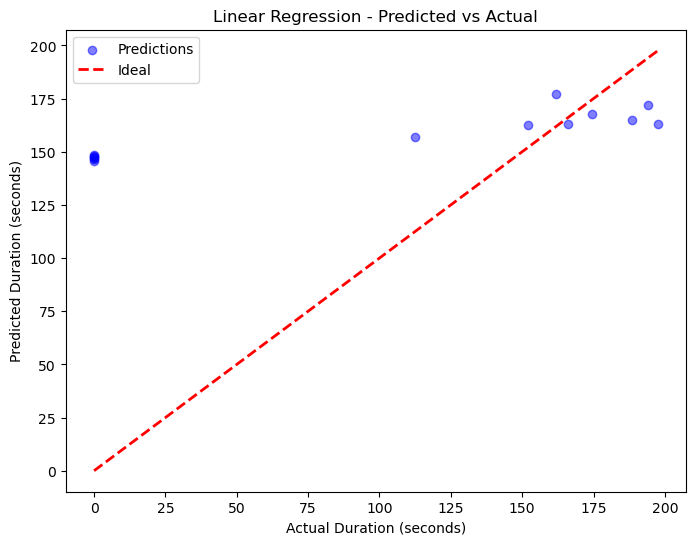

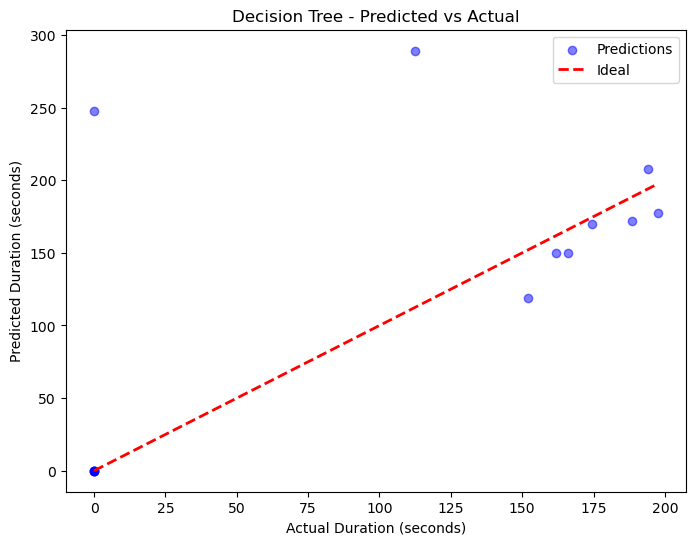

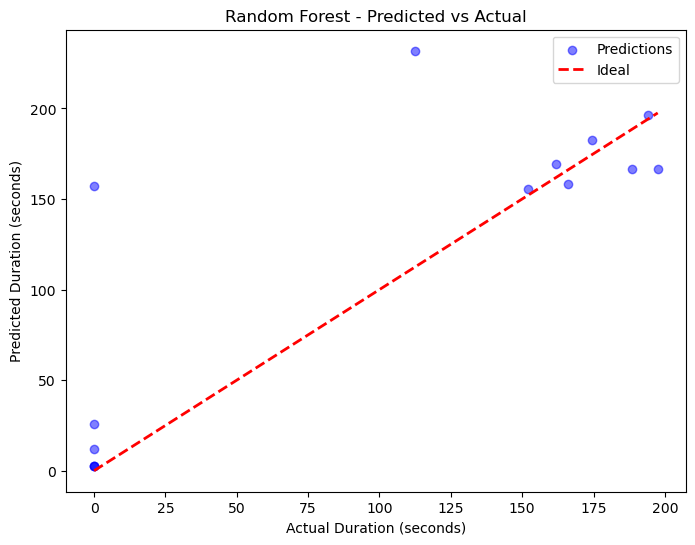

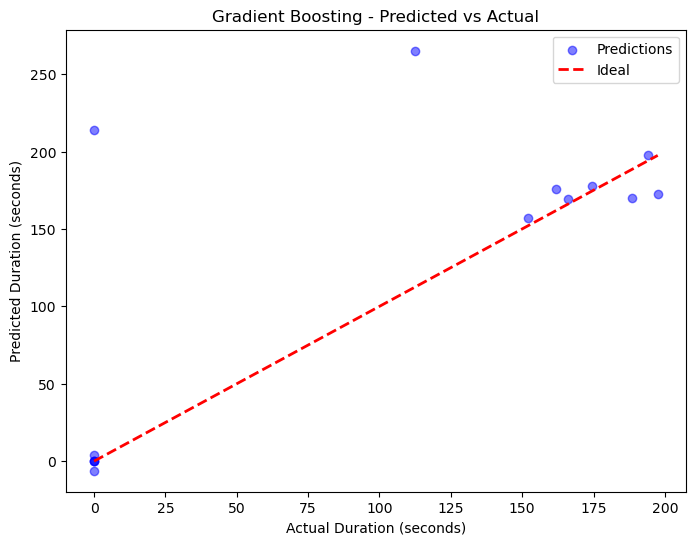

{'Linear Regression': {'MAE': 74.53571428571429,
  'MSE': 9620.22392857143,
  'R2': -0.3134349399944616},
 'Decision Tree': {'MAE': 38.59285714285715,
  'MSE': 6777.803571428572,
  'R2': 0.07463650604903538},
 'Random Forest': {'MAE': 28.839928571428537,
  'MSE': 2959.402143214284,
  'R2': 0.5959572037769252},
 'Gradient Boosting': {'MAE': 32.156168724385154,
  'MSE': 5029.117219181778,
  'R2': 0.3133820665667172}}

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Function to plot results and compute evaluation metrics
def evaluate_model(name, model, X_test, y_test, predictions):
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, predictions, alpha=0.5, label='Predictions', color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal')
    plt.title(f"{name} - Predicted vs Actual")
    plt.xlabel('Actual Duration (seconds)')
    plt.ylabel('Predicted Duration (seconds)')
    plt.legend()
    plt.show()
    
    return {'MAE': mae, 'MSE': mse, 'R2': r2}

# Evaluate each model
evaluation_results = {}

for name, model in models.items():
    predictions = model.predict(X_test)
    evaluation_results[name] = evaluate_model(name, model, X_test, y_test, predictions)

evaluation_results

The evaluation metrics for the models are as follows:

1. Linear Regression
- MAE: 74.54 seconds
- MSE: 9,620.22
- R²: -0.31
The negative R² indicates that the linear regression model fits the data poorly and performs worse than a simple mean of the target variable. This suggests a weak linear relationship between the input features and the target (duration).

2. Decision Tree
MAE: 38.59 seconds
MSE: 6,777.80
R²: 0.07
The decision tree performed better than linear regression with lower errors, but the R² score of 0.07 indicates that the model explains only about 7% of the variance in running duration, which is still quite low.

3. Random Forest
MAE: 28.84 seconds
MSE: 2,959.40
R²: 0.60
The random forest model performed much better than the previous two, with a significantly lower error and an R² score of 0.60, meaning it explains about 60% of the variance in the target variable. This suggests it provides more accurate predictions compared to linear regression and decision trees.

4. Gradient Boosting
MAE: 32.16 seconds
MSE: 5,029.12
R²: 0.31
Gradient boosting performed relatively well, with a decent R² score of 0.31, explaining 31% of the variance in the running duration. However, it still underperforms compared to random forest but is better than linear regression and decision tree models.

Conclusion:
Random Forest is the best-performing model in this case, with the lowest MAE and MSE, and the highest R² score of 0.60. It captures the relationships in the data more effectively than the other models.
Gradient Boosting also performs fairly well but is outperformed by the random forest.
Linear Regression and Decision Tree do not perform as well, with linear regression having a particularly poor fit (negative R² score).


### Conclusion:
Among the four models, Random Forest Regression is the most accurate model based on the lowest MAE, lowest MSE, and highest R² value. This model best captures the relationships between the input features (elevation, distance, and power curve) and the target variable ("Maximum Power 1.0 hr").